In [ ]:
import sys
sys.path.append('../..')

import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from utils.quantum_circuit import prepare_state, get_state_vector, calculate_fidelity, simulate, draw_state

In [ ]:
n = 4
alice_bits = ''.join(f"{n}" for n in np.random.randint(2, size=n))
alice_basis = ''.join(f"{n}" for n in np.random.randint(2, size=n))
bob_basis = ''.join(f"{n}" for n in np.random.randint(2, size=n))

print(f"Alice bits: {alice_bits}")
print(f"Alice bases: {alice_basis}")
print(f"Bob bases: {bob_basis}")

Alice bits: 1111
Alice bases: 0110
Bob bases: 0111


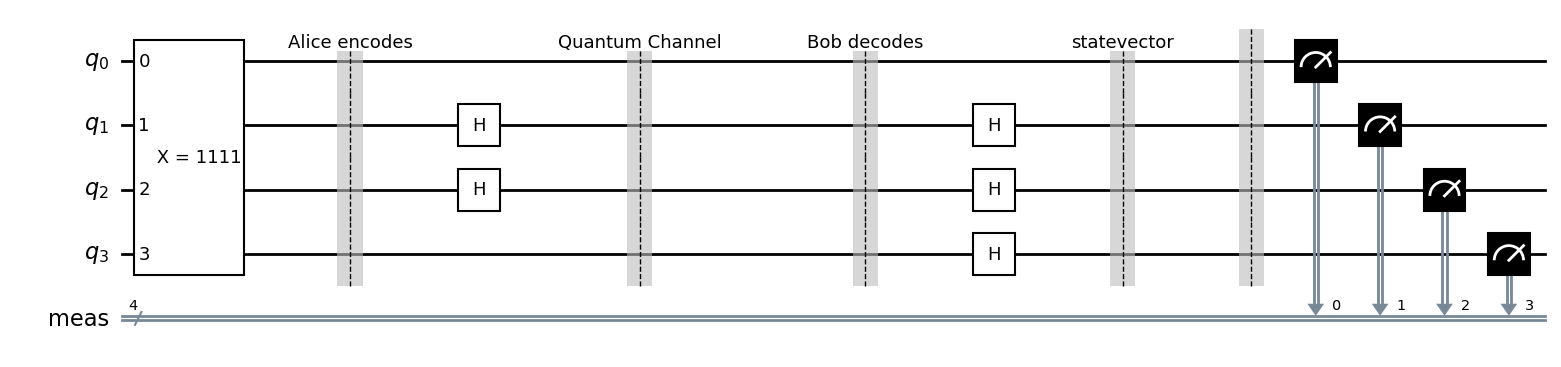

In [44]:
qc = QuantumCircuit(n)

# Alice prepares information state
qc.append(prepare_state(alice_bits, f" X = {alice_bits}"), [i for i in range(n)])

initial_state = get_state_vector(qc)

qc.barrier(label="Alice encodes")

# Alice prepare qubits based on her basis
for i in range(n):
    if alice_basis[i] == "1":
        qc.h(i)

qc.barrier(label="Quantum Channel")

qc.barrier(label="Bob decodes")

# Bob prepare his bases to measure
for i in range(n):
    if bob_basis[i] == "1":
        qc.h(i)

qc.save_statevector()

qc.measure_all()

qc.draw("mpl", style="bw", fold=-1)

In [45]:
result = simulate(qc)

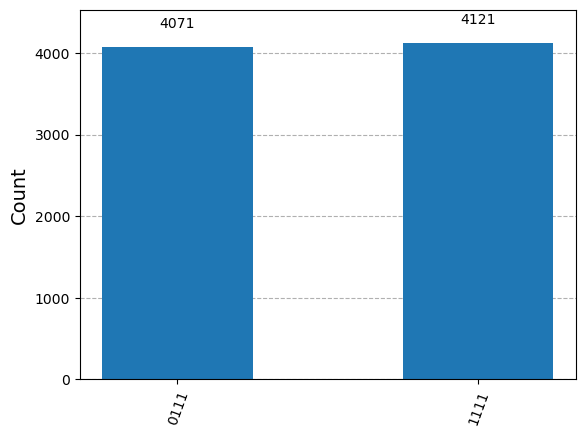

In [ ]:
plot_histogram(result.get_counts())

In [47]:
draw_state(initial_state)

<IPython.core.display.Latex object>

In [48]:
last_state = result.get_statevector()
draw_state(last_state)

<IPython.core.display.Latex object>

In [49]:
calculate_fidelity(initial_state, last_state)

0.5000000000000002